In [93]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### read dataset 


In [94]:
dataset = pd.read_csv('E:\datat\sonar.all-data.csv')
dataset.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [95]:
X = dataset.iloc[:,0:60].values
Y = dataset.iloc[:,60].values

In [96]:
encoder = LabelEncoder()
encoder.fit(Y)
y = encoder.transform(Y)

In [97]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels , n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] =1
    return one_hot_encode

In [98]:
y = one_hot_encode(y)

In [99]:
X ,Y = shuffle(X,y)

In [100]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.20, random_state= 415 )

In [101]:
learning_rate = 0.3
train_epochs = 1000

In [102]:
cost_history = np.empty(shape = [1] , dtype=float)
n_dim = X.shape[1]
n_class = 2   

In [103]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

###  y = wx + b

In [104]:
x = tf.placeholder(tf.float32,[None , n_dim])
w = tf.Variable(tf.zeros([n_dim , n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None , n_class])

In [105]:
def multilayer_precep( x , weights , biases ):
    
    m1 = tf.matmul(x, weights['h1'])
    layer_1 = tf.add(m1 , biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    m2 =tf.matmul(layer_1, weights['h1'])
    layer_2 = tf.add(m2, biases['b1'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    m3 = tf.matmul(layer_2, weights['h1'])
    layer_3 = tf.add(m3, biases['b1'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    m4 = tf.matmul(layer_3, weights['h1'])
    layer_4 = tf.add(m4, biases['b1'])
    layer_4 = tf.nn.relu(layer_4)
    
    m5 =  tf.matmul(layer_4 , weights['out'])
    out_layer = m5 + biases['out']
    return out_layer   

#### define the weights and the biases for each layer

In [106]:
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
   'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
    }


In [107]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [108]:
y = multilayer_precep( x, weights , biases)

#### Define the Cost function and Optimizer

In [109]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y , labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

### Launch the Graph

In [110]:
sess = tf.Session()
sess.run(init)

In [111]:
mse_history = []
accuracy_history = []

In [116]:
for epoch in range(train_epochs):
    sess.run(training_step , feed_dict={x:X_train ,y_: Y_train})
    cost = sess.run(cost_function , feed_dict={x:X_train,y_:Y_train})
    cost_history = np.append(cost_history , cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    
    pred_y = sess.run(y,feed_dict={x:X_test})
    mse = tf.reduce_mean(tf.square(pred_y - Y_test))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy , feed_dict = {x:X_train , y_:Y_train}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch , ' ' , 'cost :' , cost , ' ' ,'-MSE : ', mse_ , 'Train_Accuracy :',accuracy)
    

epoch:  0   cost : 0.00274296   -MSE :  23.9985880695 Train_Accuracy : 1.0
epoch:  1   cost : 0.00273073   -MSE :  24.0281624739 Train_Accuracy : 1.0
epoch:  2   cost : 0.00273173   -MSE :  24.027147167 Train_Accuracy : 1.0
epoch:  3   cost : 0.00271656   -MSE :  24.054685171 Train_Accuracy : 1.0
epoch:  4   cost : 0.00271956   -MSE :  24.053926638 Train_Accuracy : 1.0
epoch:  5   cost : 0.00270384   -MSE :  24.0826766581 Train_Accuracy : 1.0
epoch:  6   cost : 0.00270492   -MSE :  24.1071166251 Train_Accuracy : 1.0
epoch:  7   cost : 0.00269941   -MSE :  24.1046487024 Train_Accuracy : 1.0
epoch:  8   cost : 0.00268598   -MSE :  24.1325773054 Train_Accuracy : 1.0
epoch:  9   cost : 0.00268522   -MSE :  24.1380009092 Train_Accuracy : 1.0
epoch:  10   cost : 0.00267333   -MSE :  24.1654963229 Train_Accuracy : 1.0
epoch:  11   cost : 0.00267374   -MSE :  24.1646277487 Train_Accuracy : 1.0
epoch:  12   cost : 0.00265911   -MSE :  24.1929414804 Train_Accuracy : 1.0
epoch:  13   cost : 0.002

epoch:  109   cost : 0.00216737   -MSE :  25.5438623575 Train_Accuracy : 1.0
epoch:  110   cost : 0.00215572   -MSE :  25.5677898721 Train_Accuracy : 1.0
epoch:  111   cost : 0.00215456   -MSE :  25.5848630742 Train_Accuracy : 1.0
epoch:  112   cost : 0.00215346   -MSE :  25.5837032209 Train_Accuracy : 1.0
epoch:  113   cost : 0.00214255   -MSE :  25.6071409604 Train_Accuracy : 1.0
epoch:  114   cost : 0.00214337   -MSE :  25.6241377167 Train_Accuracy : 1.0
epoch:  115   cost : 0.00214054   -MSE :  25.6233377284 Train_Accuracy : 1.0
epoch:  116   cost : 0.00213022   -MSE :  25.6472055653 Train_Accuracy : 1.0
epoch:  117   cost : 0.00213115   -MSE :  25.6492838693 Train_Accuracy : 1.0
epoch:  118   cost : 0.00212192   -MSE :  25.6721001634 Train_Accuracy : 1.0
epoch:  119   cost : 0.0021221   -MSE :  25.6779758907 Train_Accuracy : 1.0
epoch:  120   cost : 0.00211349   -MSE :  25.6965294551 Train_Accuracy : 1.0
epoch:  121   cost : 0.00211424   -MSE :  25.7021122842 Train_Accuracy : 1.0


epoch:  216   cost : 0.00177471   -MSE :  26.885661267 Train_Accuracy : 1.0
epoch:  217   cost : 0.00177445   -MSE :  26.8918919009 Train_Accuracy : 1.0
epoch:  218   cost : 0.00176912   -MSE :  26.9109493418 Train_Accuracy : 1.0
epoch:  219   cost : 0.0017687   -MSE :  26.912640936 Train_Accuracy : 1.0
epoch:  220   cost : 0.00176268   -MSE :  26.9336050497 Train_Accuracy : 1.0
epoch:  221   cost : 0.00176414   -MSE :  26.9320025949 Train_Accuracy : 1.0
epoch:  222   cost : 0.00175638   -MSE :  26.9529739082 Train_Accuracy : 1.0
epoch:  223   cost : 0.0017547   -MSE :  26.9686217659 Train_Accuracy : 1.0
epoch:  224   cost : 0.0017529   -MSE :  26.9837189014 Train_Accuracy : 1.0
epoch:  225   cost : 0.00175045   -MSE :  26.9852039946 Train_Accuracy : 1.0
epoch:  226   cost : 0.00174522   -MSE :  27.0050932784 Train_Accuracy : 1.0
epoch:  227   cost : 0.00174547   -MSE :  27.0079878958 Train_Accuracy : 1.0
epoch:  228   cost : 0.00173881   -MSE :  27.0271073718 Train_Accuracy : 1.0
epoc

epoch:  323   cost : 0.00149803   -MSE :  28.0817940185 Train_Accuracy : 1.0
epoch:  324   cost : 0.00149242   -MSE :  28.1013183225 Train_Accuracy : 1.0
epoch:  325   cost : 0.00149257   -MSE :  28.1145704715 Train_Accuracy : 1.0
epoch:  326   cost : 0.00148982   -MSE :  28.1146750401 Train_Accuracy : 1.0
epoch:  327   cost : 0.00148739   -MSE :  28.1332730062 Train_Accuracy : 1.0
epoch:  328   cost : 0.00148538   -MSE :  28.1372541596 Train_Accuracy : 1.0
epoch:  329   cost : 0.00148231   -MSE :  28.1555368373 Train_Accuracy : 1.0
epoch:  330   cost : 0.00148161   -MSE :  28.1548064387 Train_Accuracy : 1.0
epoch:  331   cost : 0.00147731   -MSE :  28.1736638124 Train_Accuracy : 1.0
epoch:  332   cost : 0.00147719   -MSE :  28.1776687467 Train_Accuracy : 1.0
epoch:  333   cost : 0.00147268   -MSE :  28.1960203302 Train_Accuracy : 1.0
epoch:  334   cost : 0.00147368   -MSE :  28.1958944868 Train_Accuracy : 1.0
epoch:  335   cost : 0.00146786   -MSE :  28.2150468548 Train_Accuracy : 1.0

epoch:  430   cost : 0.00128347   -MSE :  29.1694984841 Train_Accuracy : 1.0
epoch:  431   cost : 0.0012824   -MSE :  29.1730989843 Train_Accuracy : 1.0
epoch:  432   cost : 0.00127982   -MSE :  29.1903925239 Train_Accuracy : 1.0
epoch:  433   cost : 0.0012797   -MSE :  29.1902413143 Train_Accuracy : 1.0
epoch:  434   cost : 0.00127578   -MSE :  29.2068229156 Train_Accuracy : 1.0
epoch:  435   cost : 0.00127649   -MSE :  29.2073255984 Train_Accuracy : 1.0
epoch:  436   cost : 0.00127227   -MSE :  29.2243794637 Train_Accuracy : 1.0
epoch:  437   cost : 0.00127093   -MSE :  29.2358724338 Train_Accuracy : 1.0
epoch:  438   cost : 0.0012703   -MSE :  29.2526614167 Train_Accuracy : 1.0
epoch:  439   cost : 0.00126839   -MSE :  29.2518086513 Train_Accuracy : 1.0
epoch:  440   cost : 0.00126625   -MSE :  29.2677001296 Train_Accuracy : 1.0
epoch:  441   cost : 0.00126508   -MSE :  29.2712481857 Train_Accuracy : 1.0
epoch:  442   cost : 0.00126279   -MSE :  29.2875965701 Train_Accuracy : 1.0
ep

epoch:  537   cost : 0.00111658   -MSE :  30.1613561037 Train_Accuracy : 1.0
epoch:  538   cost : 0.00111468   -MSE :  30.1735535361 Train_Accuracy : 1.0
epoch:  539   cost : 0.00111409   -MSE :  30.1763953082 Train_Accuracy : 1.0
epoch:  540   cost : 0.00111173   -MSE :  30.1927635896 Train_Accuracy : 1.0
epoch:  541   cost : 0.00111169   -MSE :  30.1934165087 Train_Accuracy : 1.0
epoch:  542   cost : 0.00110877   -MSE :  30.2087761051 Train_Accuracy : 1.0
epoch:  543   cost : 0.00110871   -MSE :  30.2124139226 Train_Accuracy : 1.0
epoch:  544   cost : 0.00110605   -MSE :  30.2268198711 Train_Accuracy : 1.0
epoch:  545   cost : 0.00110645   -MSE :  30.2272974524 Train_Accuracy : 1.0
epoch:  546   cost : 0.00110315   -MSE :  30.242941826 Train_Accuracy : 1.0
epoch:  547   cost : 0.00110291   -MSE :  30.2530078905 Train_Accuracy : 1.0
epoch:  548   cost : 0.00110108   -MSE :  30.2562828346 Train_Accuracy : 1.0
epoch:  549   cost : 0.00109987   -MSE :  30.2709479916 Train_Accuracy : 1.0


epoch:  644   cost : 0.000982602   -MSE :  31.0753617634 Train_Accuracy : 1.0
epoch:  645   cost : 0.000980668   -MSE :  31.0889894869 Train_Accuracy : 1.0
epoch:  646   cost : 0.000980514   -MSE :  31.0922441677 Train_Accuracy : 1.0
epoch:  647   cost : 0.000978194   -MSE :  31.1064144173 Train_Accuracy : 1.0
epoch:  648   cost : 0.000978402   -MSE :  31.1074659346 Train_Accuracy : 1.0
epoch:  649   cost : 0.000975893   -MSE :  31.1222381736 Train_Accuracy : 1.0
epoch:  650   cost : 0.000976304   -MSE :  31.1231910946 Train_Accuracy : 1.0
epoch:  651   cost : 0.000973593   -MSE :  31.137273379 Train_Accuracy : 1.0
epoch:  652   cost : 0.000973385   -MSE :  31.1465986067 Train_Accuracy : 1.0
epoch:  653   cost : 0.000972139   -MSE :  31.1489731909 Train_Accuracy : 1.0
epoch:  654   cost : 0.000970797   -MSE :  31.1625100895 Train_Accuracy : 1.0
epoch:  655   cost : 0.00097038   -MSE :  31.1631484158 Train_Accuracy : 1.0
epoch:  656   cost : 0.00096833   -MSE :  31.1770552214 Train_Accu

epoch:  750   cost : 0.000874965   -MSE :  31.905080302 Train_Accuracy : 1.0
epoch:  751   cost : 0.000873932   -MSE :  31.9046099434 Train_Accuracy : 1.0
epoch:  752   cost : 0.000872681   -MSE :  31.9175398386 Train_Accuracy : 1.0
epoch:  753   cost : 0.000872211   -MSE :  31.9199113763 Train_Accuracy : 1.0
epoch:  754   cost : 0.000870806   -MSE :  31.9327864651 Train_Accuracy : 1.0
epoch:  755   cost : 0.000870582   -MSE :  31.9335236167 Train_Accuracy : 1.0
epoch:  756   cost : 0.000868835   -MSE :  31.9471777971 Train_Accuracy : 1.0
epoch:  757   cost : 0.000868848   -MSE :  31.9479386564 Train_Accuracy : 1.0
epoch:  758   cost : 0.000866896   -MSE :  31.9611222244 Train_Accuracy : 1.0
epoch:  759   cost : 0.00086619   -MSE :  31.9677936321 Train_Accuracy : 1.0
epoch:  760   cost : 0.000865793   -MSE :  31.9804021525 Train_Accuracy : 1.0
epoch:  761   cost : 0.000864433   -MSE :  31.9833442615 Train_Accuracy : 1.0
epoch:  762   cost : 0.000863852   -MSE :  31.9960170661 Train_Acc

epoch:  856   cost : 0.000784681   -MSE :  32.6564237338 Train_Accuracy : 1.0
epoch:  857   cost : 0.000782921   -MSE :  32.6694207829 Train_Accuracy : 1.0
epoch:  858   cost : 0.000783162   -MSE :  32.6705150028 Train_Accuracy : 1.0
epoch:  859   cost : 0.000781357   -MSE :  32.6829626868 Train_Accuracy : 1.0
epoch:  860   cost : 0.00078097   -MSE :  32.689375501 Train_Accuracy : 1.0
epoch:  861   cost : 0.000780236   -MSE :  32.6994811516 Train_Accuracy : 1.0
epoch:  862   cost : 0.000779543   -MSE :  32.7021898707 Train_Accuracy : 1.0
epoch:  863   cost : 0.000778655   -MSE :  32.7137039327 Train_Accuracy : 1.0
epoch:  864   cost : 0.000778181   -MSE :  32.7147236706 Train_Accuracy : 1.0
epoch:  865   cost : 0.000776965   -MSE :  32.7270916209 Train_Accuracy : 1.0
epoch:  866   cost : 0.00077675   -MSE :  32.7275850244 Train_Accuracy : 1.0
epoch:  867   cost : 0.000775395   -MSE :  32.7399245511 Train_Accuracy : 1.0
epoch:  868   cost : 0.000775258   -MSE :  32.7409979041 Train_Accu

epoch:  962   cost : 0.000709158   -MSE :  33.3638147773 Train_Accuracy : 1.0
epoch:  963   cost : 0.000708216   -MSE :  33.3749717132 Train_Accuracy : 1.0
epoch:  964   cost : 0.000707898   -MSE :  33.3761037524 Train_Accuracy : 1.0
epoch:  965   cost : 0.000706852   -MSE :  33.3869234887 Train_Accuracy : 1.0
epoch:  966   cost : 0.000706694   -MSE :  33.3880502886 Train_Accuracy : 1.0
epoch:  967   cost : 0.000705528   -MSE :  33.3996372565 Train_Accuracy : 1.0
epoch:  968   cost : 0.000705449   -MSE :  33.4007731843 Train_Accuracy : 1.0
epoch:  969   cost : 0.00070424   -MSE :  33.4118626163 Train_Accuracy : 1.0
epoch:  970   cost : 0.000704068   -MSE :  33.4149548288 Train_Accuracy : 1.0
epoch:  971   cost : 0.00070297   -MSE :  33.4258580227 Train_Accuracy : 1.0
epoch:  972   cost : 0.000702906   -MSE :  33.4264905081 Train_Accuracy : 1.0
epoch:  973   cost : 0.000701602   -MSE :  33.4372409764 Train_Accuracy : 1.0
epoch:  974   cost : 0.000701674   -MSE :  33.4384435964 Train_Acc

In [128]:
save_path = saver.save(sess, 'C:/Users/Gourav/Documents/GitHub')
print("Model saved in file: %s", save_path)

Model saved in file: %s C:/Users/Gourav/Documents/GitHub


In [129]:
path = 'C:/Users/Gourav/Documents/GitHub'

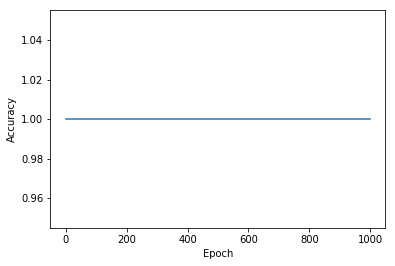

In [130]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

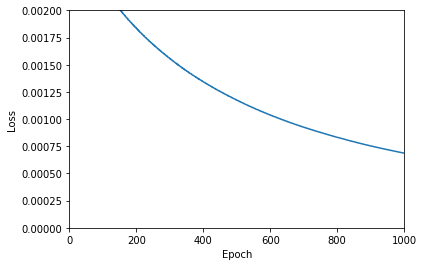

In [131]:
plt.plot(range(len(cost_history)) , cost_history)
plt.axis([0,train_epochs, 0 , np.max(cost_history)/100])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [135]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.square(pred_y - Y_test))
print('test Accuracy : ',(sess.run(y,feed_dict={x:X_test, y_:Y_test})))

test Accuracy :  [[  1.64697397  -6.70542908]
 [ -7.71598911   6.31288385]
 [  5.14164925  -6.2139287 ]
 [ -3.70737386  -1.73621178]
 [ -3.34024668   2.65085292]
 [  3.97542882  -6.11361742]
 [  1.43874395  -4.16282368]
 [  8.28682899 -13.08482075]
 [ -0.7115593   -2.67343116]
 [ -7.39256525   3.3923347 ]
 [ -4.41213274   1.51952696]
 [  6.36903477  -5.2974925 ]
 [ -7.85640907   4.56753254]
 [-12.15014935   4.31253099]
 [  0.57110512  -4.02174234]
 [-10.03288269   7.10271549]
 [-11.76668262   7.53045702]
 [  2.03723502  -6.42862272]
 [  6.36331606  -7.18366098]
 [  4.65804529  -8.83093452]
 [ -2.79821706   1.4833684 ]
 [  3.69621396  -3.5574851 ]
 [ -6.89516449   3.82296824]
 [  7.30140066  -8.11222744]
 [  1.05005395  -4.23368263]
 [ -5.61209393   5.02442408]
 [ -2.49874806   0.09491366]
 [ -7.59978104   5.14779806]
 [  6.45269203  -6.67620611]
 [ -8.459445     6.80779505]
 [ -5.84514427   3.73618579]
 [  3.45621419  -6.71879721]
 [ -4.5712471   -5.74312162]
 [ -5.30673981   3.4429256

In [144]:
pred_y = sess.run( y , feed_dict= { x:X_test})
mse = tf.reduce_mean(tf.square(pred_y - Y_test))
print(" MSE : %4.f"  %sess.run(mse))

 MSE :   34
